<a href="https://colab.research.google.com/github/21pa1a6128/21pa1a6128/blob/main/Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment-12**

**Long Short Term Memory** networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. Introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work. They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [6]:
prices_dataset =  pd.read_csv('/content/drive/MyDrive/prices.csv',header=0)
prices_dataset

date symbol        open       close         low  \
0       2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998   
1       2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002   
2       2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000   
3       2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000   
4       2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996   
...                     ...    ...         ...         ...         ...   
851259           2016-12-30    ZBH  103.309998  103.199997  102.849998   
851260           2016-12-30   ZION   43.070000   43.040001   42.689999   
851261           2016-12-30    ZTS   53.639999   53.529999   53.270000   
851262  2016-12-30 00:00:00    AIV   44.730000   45.450001   44.410000   
851263  2016-12-30 00:00:00    FTV   54.200001   53.630001   53.389999   

              high     volume  
0       126.250000  2163600.0  
1       125.540001  2386400.0  
2       119.739998  2489500.0  
3       117.440002  2006300.0  
4       117.330002  1408600.0  
...            ...        ...  
851259  103.930000   973800.0  
851260   43.310001  1938100.0  
851261   53.740002  1701200.0  
851262   45.590000  1380900.0  
851263   54.480000   705100.0  

[851264 rows x 7 columns]

In [10]:
yahoo = prices_dataset[prices_dataset['symbol']=='YHOO']
yahoo_stock_prices = yahoo.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(1762, 1)
yahoo_stock_prices.shape

(1762, 1)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


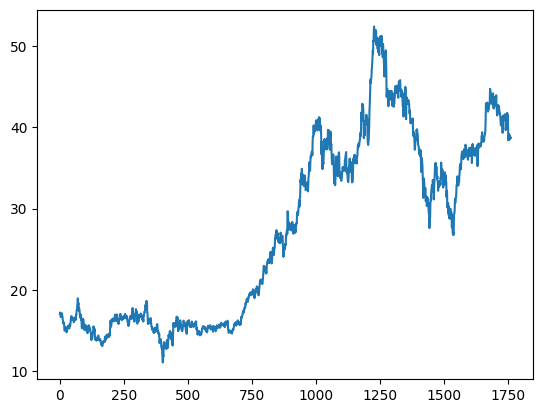

In [12]:
plt.plot(yahoo_stock_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)

In [13]:
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size,:], yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]
print(len(train), len(test))

1409 353


In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.022960424423217773


In [18]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=10,
    validation_split=0.05)

Epoch 1/10
11/11 [==============================] - 6s 101ms/step - loss: 0.1472 - val_loss: 0.3806
Epoch 2/10
11/11 [==============================] - 0s 10ms/step - loss: 0.1025 - val_loss: 0.2591
Epoch 3/10
11/11 [==============================] - 0s 15ms/step - loss: 0.0700 - val_loss: 0.1651
Epoch 4/10
11/11 [==============================] - 0s 13ms/step - loss: 0.0541 - val_loss: 0.1077
Epoch 5/10
11/11 [==============================] - 0s 13ms/step - loss: 0.0456 - val_loss: 0.0821
Epoch 6/10
11/11 [==============================] - 0s 14ms/step - loss: 0.0390 - val_loss: 0.0605
Epoch 7/10
11/11 [==============================] - 0s 16ms/step - loss: 0.0308 - val_loss: 0.0560
Epoch 8/10
11/11 [==============================] - 0s 15ms/step - loss: 0.0221 - val_loss: 0.0327
Epoch 9/10
11/11 [==============================] - 0s 10ms/step - loss: 0.0143 - val_loss: 0.0250
Epoch 10/10
11/11 [==============================] - 0s 10ms/step - loss: 0.0081 - val_loss: 0.0079


## work in progress

1/1 [==============================] - 1s 810ms/step
[[0.5636368]]
1/1 [==============================] - 1s 769ms/step
[[1.2527319]]
1/1 [==============================] - 0s 21ms/step
[[2.431441]]
1/1 [==============================] - 0s 23ms/step
[[4.2324495]]
1/1 [==============================] - 0s 24ms/step
[[6.155529]]
1/1 [==============================] - 0s 26ms/step
[[ 34.356926]
 [ 62.80277 ]
 [111.459885]
 [185.80551 ]
 [265.19022 ]]


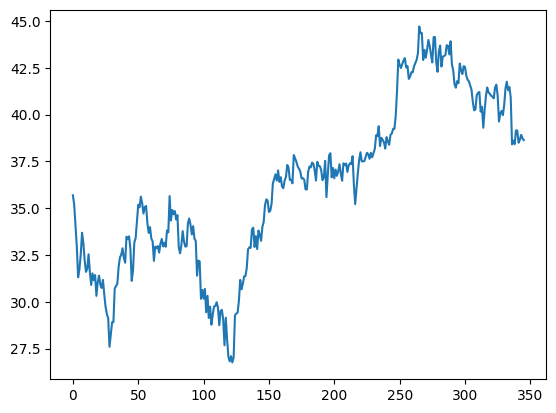

In [19]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue

    for i in range(length):
        predicted = []

        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])

        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)

        prediction_seqs.append(predicted[-1])

    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)



---